In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [421]:
df = pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [3]:
cmap =sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\VictoriaShen\AppData\Local\Temp\ipykernel_8340\3056112379.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap, axis=1)\


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


In [410]:
n_df = df[['age','sex','cp', 'trestbps','chol','fbs',
       'restecg','thalach', 'exang', 'oldpeak','slope','ca','thal']]
target = df['target']

In [419]:
X_train, X_test, y_train, y_test = train_test_split(n_df,
                                                    target,
                                                    test_size=0.2)

In [420]:
tree_model = tree.DecisionTreeClassifier()
tree_preds = tree_model.fit(X_train, y_train).predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
print('LDA Accuracy: {}'.format(tree_acc))

LDA Accuracy: 0.9853658536585366


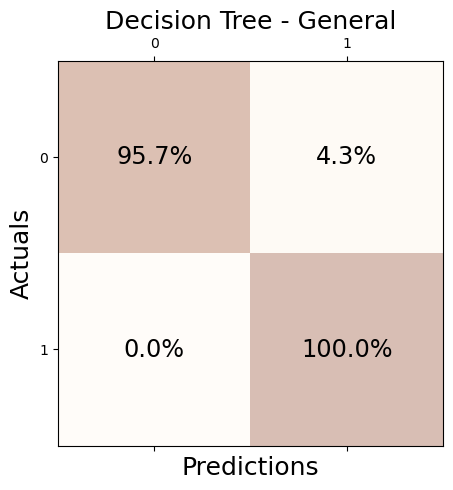

In [407]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, tree_preds.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree - General', fontsize=18)
plt.show()

In [8]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test, tree_preds)
print('Recall: %f' % recall)

Recall: 0.969697


In [9]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, tree_preds)
print('F1-Score: %f' % f1)

F1-Score: 0.984615


In [126]:
from sklearn.metrics import classification_report 
classification_report = classification_report(y_test, tree_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.97      1.00      0.99       106

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



In [11]:
from sklearn.metrics import roc_curve
tree_prob = tree_model.predict_proba(X_test)
probs = tree_prob[:, 1]
rfp,rvp,lim = roc_curve(y_test, probs)

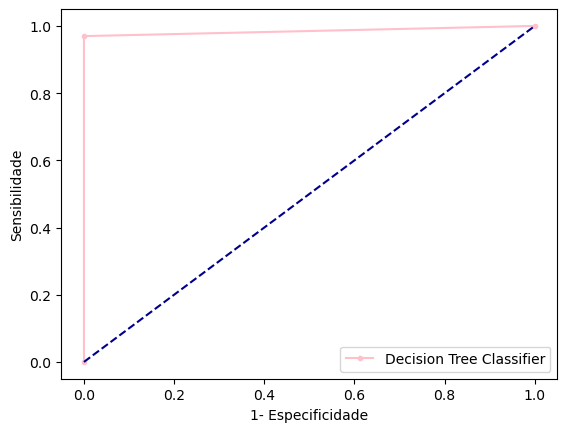

In [12]:
plt.plot(rfp, rvp, marker='.', label='Decision Tree Classifier',color="pink")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
tree_preds = tree_model.fit(X_train, y_train)
roc_auc_score(y_test,tree_preds.predict_proba(X_test)[:, 1])

1.0

In [294]:
new_df = df[['age','sex', 'trestbps','fbs',
       'restecg','thalach', 'oldpeak','slope']]
target = df['target']

In [295]:
X_train, X_test, y_train, y_test = train_test_split(new_df,
                                                    target,
                                                    test_size=0.2)

In [296]:
# X_train, X_dev, y_train, y_dev = train_test_split(X_train,
#                                                     y_train,
# #                                                     random_state=3,
#                                                     test_size=0.16)

In [297]:
tree_model = tree.DecisionTreeClassifier()
tree_preds = tree_model.fit(X_train, y_train).predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
print('LDA Accuracy: {}'.format(tree_acc))

LDA Accuracy: 0.9853658536585366


In [298]:
# tree_preds = tree_model.predict(X_test)
# tree_acc = accuracy_score(y_test, tree_preds)
# print('LDA Accuracy: {}'.format(tree_acc))

In [299]:
# from sklearn.metrics import precision_score
# tree_preds = precision_score(y_test, tree_preds)
# print('Precision: {}'.format(tree_preds))

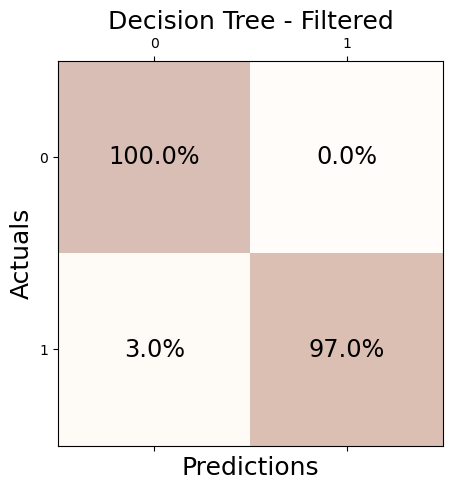

In [300]:
conf_matrix = confusion_matrix(y_test, tree_preds.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree - Filtered', fontsize=18)
plt.show()

In [159]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, tree_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.97      0.99       106

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [22]:
import plotly.graph_objects as go
Models=['Logistic Regression', 'Lasso Regression', 'SVM','Decision Tree']
fig = go.Figure(data=[
    go.Bar(name='General', x=Models, y=[50, 73, 83,98],
          marker_color='pink'),
    go.Bar(name='Filtered', x=Models, y=[54, 71, 83,97],
          marker_color='lightblue')
])
fig.update_layout(
        boxmode='group',
        title='Accuracy vs Models',title_x=0.5
)
fig.update_layout(
    yaxis_title="Accuracy",
)
fig.update_layout(
    xaxis_title="Models",
)
fig.show()